# Generate radar data

![radar reflection signal from Trombe 2013](Trombe_2013_radar.png)

In [1]:
import numpy as np
from scipy.interpolate import interp1d

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [278]:
pts = [
    (0, 270),
    (1, 310),
    (2, 270),
    (4, 100),
    (15, -50),
    (30, 0),
    (34, 50),
    (36, -20),
    (37, -20),
    (38, 15),
    (40, -20),
    (47, -20),
    (48, 10),
    (51, -20),
    (55, -20),
    (56, 20),
    (57, 18),
    (58, 10),
    (60, -20)
]
xi, yi = np.array(pts).T

In [279]:
x = np.linspace(0, xi.max(), 300)
y2 = interp1d(xi, yi, 'quadratic')(x)
y3 = interp1d(xi, yi, 'cubic')(x)

(-20, 330.2858191486218)

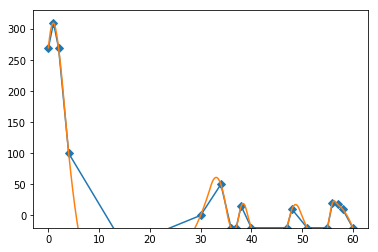

In [280]:
plt.plot(xi, yi, 'D-')
plt.plot(x, y2, '-')
#plt.plot(x, y3, '-')
plt.ylim(ymin=-20)

In [281]:
def sat(x):
    scale = x.max()/10
    xs = x/scale
    xs = np.log(np.sqrt(1+np.exp(2*xs)))
    xs *= scale
    return xs

In [282]:
sat(np.array([-1., 0, 1, 10])).round(2)

array([ 0.06,  0.35,  1.06, 10.  ])

In [283]:
y2s = sat(y2)

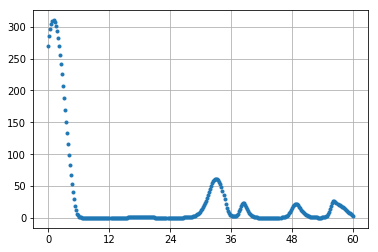

In [284]:
plt.plot(x, y2s, '.')
plt.grid()
plt.xticks(np.arange(6)*12);

In [285]:
(y2<1).mean()

0.7033333333333334

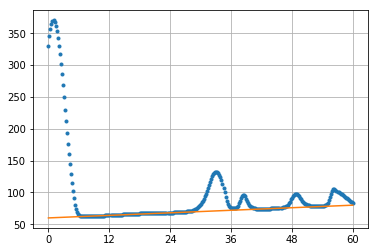

In [289]:
y2s_trend = y2s+60+x*2/6
plt.plot(x, y2s_trend, '.')
plt.plot(x, 60+x*2/6, '-')
plt.grid()
plt.xticks(np.arange(6)*12);

In [296]:
y.shape

(50,)

In [298]:
data = np.vstack((x,y2s_trend)).T
data.shape

(300, 2)

In [299]:
np.savetxt('radar_data.csv', data, delimiter=',')